In [73]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import 'random' to generate random sample
import random

# import statistics to perform statistical computation  
import statistics

# import 'stats' package from scipy library
from scipy import stats

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# to test the normality 
from scipy.stats import shapiro

# import the function to calculate the power of test
from statsmodels.stats import power

In [74]:
#Import the dataset

df = pd.read_csv('Drug safety and pharmacovigilance.csv')
df['Drug'] = df['Drug'].replace({'DrugY': 'Drug Y', 'drugX': 'Drug X', 'drugA': 'Drug A', 'drugC': 'Drug C', 'drugB': 'Drug B'})

In [75]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,Drug Y
1,47,M,LOW,HIGH,13.093,Drug C
2,47,M,LOW,HIGH,10.114,Drug C
3,28,F,NORMAL,HIGH,7.798,Drug X
4,61,F,LOW,HIGH,18.043,Drug Y


In [76]:
# Making a statistical summary of all numerical columns in the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [77]:
# Taking the value caunt of the gender of the patients in the dataset

df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

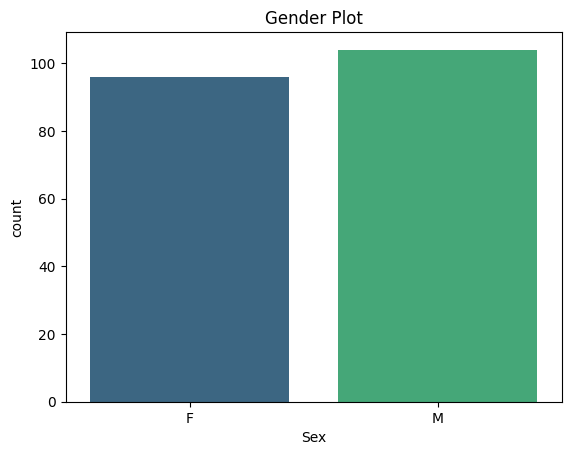

In [78]:
# Making a barplot of on the gender of the patients.

sns.countplot(data=df, x='Sex', palette='viridis')
plt.title('Gender Plot')
plt.show()

In [79]:
# Taking the value caunt of the Drug Types in the dataset.

df['Drug'].value_counts()

Drug Y    91
Drug X    54
Drug A    23
Drug C    16
Drug B    16
Name: Drug, dtype: int64

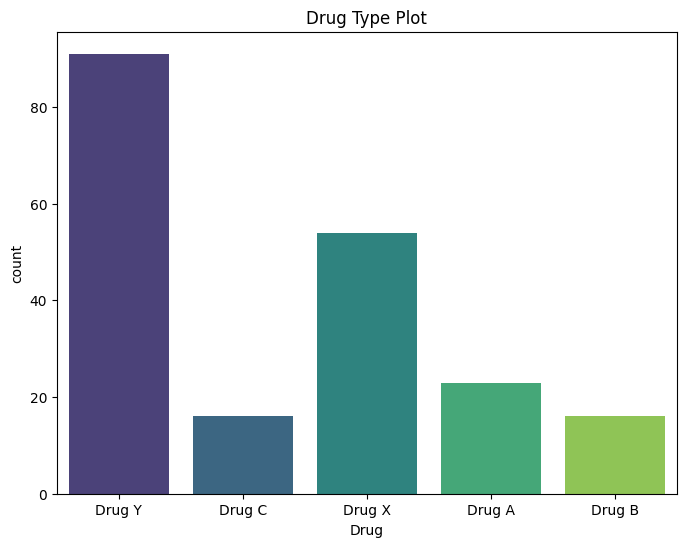

In [96]:
# Making a barplot of on the Drug Types in the dataset.

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Drug', palette='viridis')
plt.title('Drug Type Plot')
plt.show()

In [97]:
# Taking the value count of the Blood Pressure in the dataset.

df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

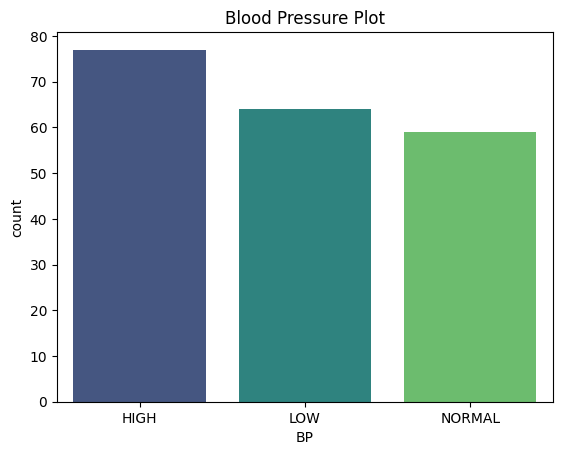

In [98]:
# Making a barplot of on the Blood Pressure in the dataset.

sns.countplot(data=df, x='BP', palette='viridis')
plt.title('Blood Pressure Plot')
plt.show()

In [99]:
# Taking the value count of the Cholesterol in the dataset.

df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [ ]:
# Making a barplot of on the Cholesterol in the dataset.

sns.countplot(data=df, x='Cholesterol', palette='viridis')
plt.title('Cholesterol-Level Plot')
plt.show()

# Data Manipulation and Feature Transformation

In [207]:
# Defining the replacement mappings for multiple columns
replacements = {
    'Sex': {'M': 1, 'F': 0},
    'Cholesterol': {'HIGH': 1, 'NORMAL': 0},
    'BP': {'HIGH': 1, 'NORMAL': 0, 'LOW': 1},
}

# Creating a new DataFrame with the replacements applied
new_df = df.replace(replacements)

In [208]:

# Categorizing 'Age' into three bins based on quantiles
new_df['Age_Group'] = pd.qcut(new_df['Age'], q=[0, 0.25, 0.75, 1], labels=['<31', '31 to 58', '>58'])

# Categorizing 'Na_to_K' into three bins based on quantiles
new_df['Na_K_Ratio_Group'] = pd.qcut(new_df['Na_to_K'], q=[0, 0.25, 0.75, 1], labels=['<10.45', '>10.45 to <19.40', '>19.40'])

drop_columns = ['Age', 'Na_to_K']
new_df = new_df.drop(drop_columns, axis=1)

new_df.head()

,Sex,BP,Cholesterol,Drug,Age_Group,Na_K_Ratio_Group
0,0,1,1,Drug Y,<31,>19.40
1,1,1,1,Drug C,31 to 58,>10.45 to <19.40
2,1,1,1,Drug C,31 to 58,<10.45
3,0,0,1,Drug X,<31,<10.45
4,0,1,1,Drug Y,>58,>10.45 to <19.40


# Hypothesis Testing and Statistical Inference

In [209]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [210]:
categorical_values = new_df[['Sex','BP','Drug','Cholesterol','Age_Group', 'Na_K_Ratio_Group']]

categorical_values.head(5)

,Sex,BP,Drug,Cholesterol,Age_Group,Na_K_Ratio_Group
0,0,1,Drug Y,1,<31,>19.40
1,1,1,Drug C,1,31 to 58,>10.45 to <19.40
2,1,1,Drug C,1,31 to 58,<10.45
3,0,0,Drug X,1,<31,<10.45
4,0,1,Drug Y,1,>58,>10.45 to <19.40


In [211]:
rows= []

for var1 in categorical_values:
  col = []
  for var2 in categorical_values :
    cramers =cramers_V(categorical_values[var1], categorical_values[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df_cramer = pd.DataFrame(cramers_results, columns = categorical_values.columns, index =categorical_values.columns)

In [212]:
df_cramer

,Sex,BP,Drug,Cholesterol,Age_Group,Na_K_Ratio_Group
Sex,0.98,0.00,0.01,0.00,0.01,0.02
BP,0.00,0.98,0.30,0.02,0.01,0.03
Drug,0.01,0.30,1.00,0.10,0.07,0.26
Cholesterol,0.00,0.02,0.10,0.98,0.01,0.00
Age_Group,0.01,0.01,0.07,0.01,1.00,0.01
Na_K_Ratio_Group,0.02,0.03,0.26,0.00,0.01,1.00


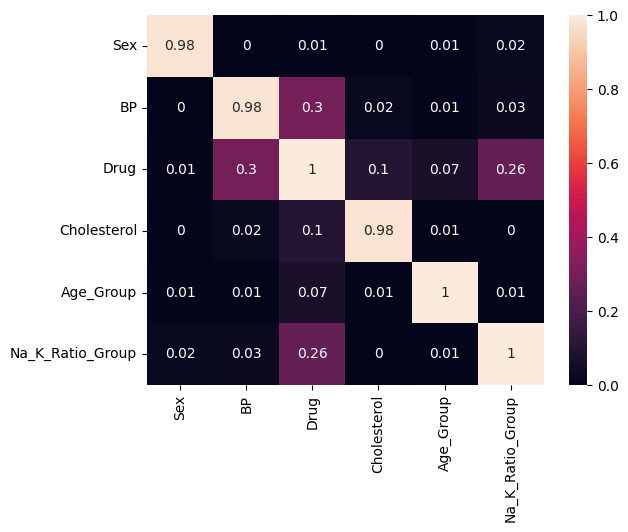

In [213]:
# generating 2-D 10x10 matrix of random numbers
# from 1 to 100
data = np.random.randint(low=1,
                         high=100,
                         size=(10, 10))
  
# setting the parameter values
annot = True
  
# plotting the heatmap
hm = sns.heatmap(data=df_cramer,
                annot=annot)
  
# displaying the plotted heatmap
plt.show()

In [214]:
new_df.head()

,Sex,BP,Cholesterol,Drug,Age_Group,Na_K_Ratio_Group
0,0,1,1,Drug Y,<31,>19.40
1,1,1,1,Drug C,31 to 58,>10.45 to <19.40
2,1,1,1,Drug C,31 to 58,<10.45
3,0,0,1,Drug X,<31,<10.45
4,0,1,1,Drug Y,>58,>10.45 to <19.40


## Running Chi-Square Test for Independence

In [215]:
# Creating contingency tables
bp_drug_table = pd.crosstab(new_df['BP'], new_df['Drug'])
bp_drug_table

Drug,Drug A,Drug B,Drug C,Drug X,Drug Y
BP,,,,,
0,0,0,0,36,23
1,23,16,16,18,68


In [216]:
# Performing chi-square test of independence
bp_chi2, bp_p, bp_dof, bp_expected = chi2_contingency(bp_drug_table)

print(f"BP vs Drug p-value: {bp_p}")

BP vs Drug p-value: 3.4163844695928926e-12


In [217]:
chol_drug_table = pd.crosstab(new_df['Cholesterol'], new_df['Drug'])
chol_drug_table

Drug,Drug A,Drug B,Drug C,Drug X,Drug Y
Cholesterol,,,,,
0,11,8,0,34,44
1,12,8,16,20,47


In [218]:
chol_chi2, chol_p, chol_dof, chol_expected = chi2_contingency(chol_drug_table)

print(f"Cholesterol vs Drug p-value: {chol_p}")

Cholesterol vs Drug p-value: 0.0005962588389856504


In [219]:
sex_drug_table = pd.crosstab(new_df['Sex'], new_df['Drug'])
sex_drug_table

Drug,Drug A,Drug B,Drug C,Drug X,Drug Y
Sex,,,,,
0,9,6,7,27,47
1,14,10,9,27,44


In [220]:
sex_chi2, sex_p, sex_dof, sex_expected = chi2_contingency(sex_drug_table)

print(f"Sex vs Drug p-value: {sex_p}")

Sex vs Drug p-value: 0.7138369773987128


In [221]:
age_gr_drug_table = pd.crosstab(new_df['Age_Group'], new_df['Drug'])
age_gr_drug_table



Drug,Drug A,Drug B,Drug C,Drug X,Drug Y
Age_Group,,,,,
<31,8,0,5,13,26
31 to 58,15,5,8,28,44
>58,0,11,3,13,21


In [222]:
agr_chi2, agr_p, agr_dof, agr_expected = chi2_contingency(age_gr_drug_table)

print(f"Age_Group vs Drug p-value: {agr_p}")

Age_Group vs Drug p-value: 0.000801579802393098


In [ ]:
na_k_drug_table = pd.crosstab(new_df['Na_K_Ratio_Group'], new_df['Drug'])
age_gr_drug_table
